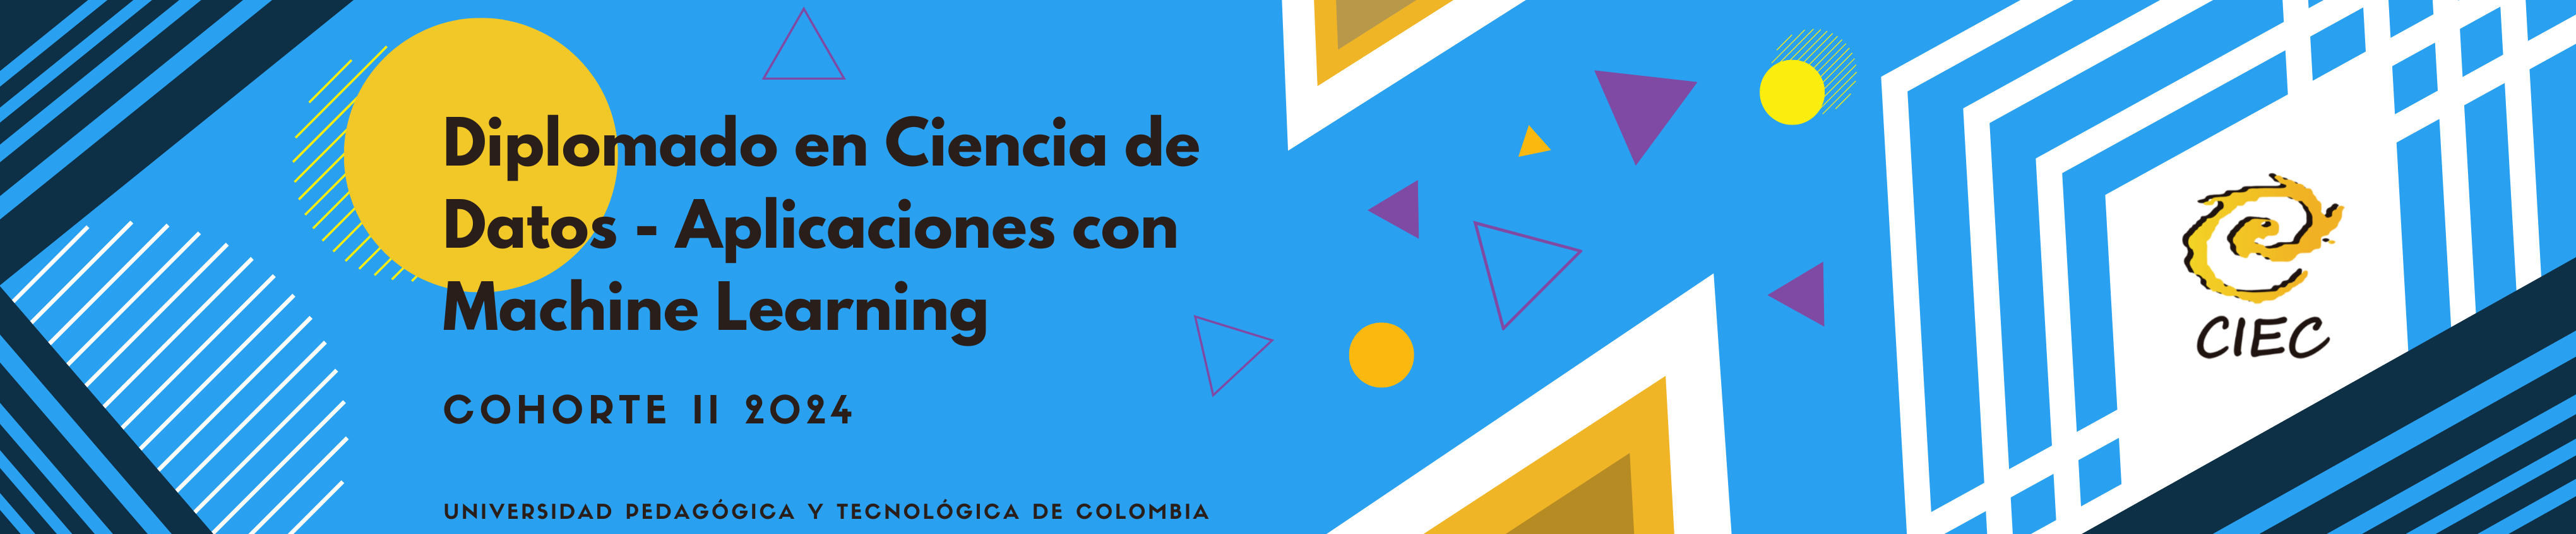

<h1 style="color: #FECB05; text-align: center;"> Análisis de Componentes Principales </h1>

<h2 style="color: #007ACC;">Autores</h2>

- [Juan Felipe Contreras Alcívar](https://www.linkedin.com/in/juanf-contreras/)

---

<h2 style="color: #007ACC;">Tabla de contenido</h2>

- [<span style="color: #005C99;">Introducción</span>](#introduction)
- [<span style="color: #005C99;">Proceso matemático</span>](#dim-curse)
- [<span style="color: #005C99;">Consideraciones</span>](#reference)
- [<span style="color: #005C99;">Variaciones del análisis de componentes principales</span>](#reference)
- [<span style="color: #005C99;">Referencias</span>](#reference)

---

<h2 style="color: #007ACC;"> Introducción </h2>

El análisis de componentes principales (PCA, por sus siglas en inglés) es una técnica estadística utilizada para simplificar la complejidad de conjuntos de datos multivariados, identificando patrones subyacentes y resumiendo la información en nuevas variables llamadas componentes principales. Esta técnica es ampliamente utilizada en diversos campos, desde la biología hasta la ingeniería, para explorar la estructura interna de los datos y reducir su dimensionalidad manteniendo la mayor cantidad posible de información. En este proceso, PCA busca maximizar la varianza de los datos proyectados en nuevas dimensiones ortogonales, lo que facilita la interpretación y el análisis de los conjuntos de datos de alta dimensionalidad.

<img src='../img/pca.png' width='1000'>

Fuente: [Matthias Scholz](http://phdthesis-bioinformatics-maxplanckinstitute-molecularplantphys.matthias-scholz.de/)

---

<h2 style="color: #007ACC;"> Proceso matemático </h2>

Desde el punto de vista del álgebra lineal, el PCA corresponde a una transformación ortogonal de los datos originales. Puede demostrarse que los componentes principales se pueden encontrar con los principales vectores propios de la matriz de varianzas y covarianzas. Sea $\mathbf{X}_{n \text{x} m }$ una matriz en un espacio m-dimensional, trabajaremos con la matriz $\mathbf{\tilde{X}}$, su versión centrada en la media (restamos la media de cada columna). El proceso de centralización de la media es importante debido a la diferencia en las unidades de medidas de las columnas de la matriz $X$. Dado que este proceso de reducción de dimensión utiliza como insumo la matriz de varianzas y covarianzas, al tener diferencia en las unidades de medida, obtendremos información no confiable en las diferentes varianzas y problemas de comparabilidad.

A continuación se presenta un paso a paso de cómo se lleva a cabo esta transformación.

**Calcular la matriz de varianzas y covarianzas**

$$ \Sigma = V\left[ \mathbf{\tilde{X}} \right] = \mathbf{\tilde{X}}^{T} \mathbf{\tilde{X}}$$

**Encontrar los valores propios y vectores propios de la matriz**

$$\Sigma \mathbf{v} = \lambda \mathbf{v}$$

donde $\mathbf{v}$ es un vector propio y $\lambda$ un valor propio. Esto se encuentra resolviendo el sistema de ecuaciones, tal que $det(\Sigma − \lambda I)=0$. Para encontrar los $n$ valores propios, y sus respectivos vectores propios (estos son los componentes principales), ordenamos de la siguiente forma:

$$\{ \lambda^{(1)}, \lambda^{(2)}, ... , \lambda^{(m)} \}, \quad \{\mathbf{v}^{(1)}, \mathbf{v}^{(2)}, ...., \mathbf{v}^{(m)}\}$$

tal que $\lambda^{(1)} > \lambda^{(2)} > ... > \lambda^{(m)}$. Si queremos proyectar la matriz $\mathbf{X}$ sobre un espacio de dimensión $k < m$, tomamos los primeros $k$ valores propios y sus correspondientes vectores propios y creamos la matriz $\mathbf{W} = \{\mathbf{v}^{(1)}, \mathbf{v}^{(2)}, ...., \mathbf{v}^{(k)} \}$.

**Se proyecta la matriz $\mathbf{X}$ sobre $R^{k}$**

Para proyectar una matriz sobre un subespacio, utilizamos una matriz transformadora, que, en nuestro caso, es la matriz $\mathbf{W}$:

$$C = \mathbf{\tilde{X}} \mathbf{W}$$

dónde $\mathbf{C}_{n \text{x} k}$ es la matriz reducida.

<h3 id="subsection1-1" style="color: #003366;">Varianza explicada y calidad de la reducción</h3>

Puede demostrarse que la varianza total explicada por cada componente principal viene dada por 

$$var_{j} = \frac{\lambda_{j}}{\sum_{i = 1}^{m} \lambda_{i}}$$

para los componentes principales $j = 1, 2, ..., k$. De esta manera, podemos definir la calidad de la reducción de dimensión con base en la cantidad de variación recuperada por medio de $\mathbf{C}$. sea $per$ la variación recuperada:

$$per = \sum_{i = 1}^{k} var_{i} = \frac{\sum_{i = 1}^{k} \lambda_{i}}{\sum_{i = 1}^{m} \lambda_{i}}$$

<h3 id="subsection1-1" style="color: #003366;">VPropiedades de los vectores propios</h3>

1. Sea $\mathbf{v}_{j}$ el vector propio $j$, entonces, $\mathbf{v}_{j} \cdot \mathbf{v}_{j} = 1$.
2. Sean $\mathbf{v}_{i}$ y $\mathbf{v}_{j}$ los vectores propios $i$ y $j$, respectivamente ($i \neq j$), entonces, $\mathbf{v}_{i} \cdot \mathbf{v}_{j} = 0$.
3. Por las propiedades 1 y 2, se tiene que, conociendo la matriz de vectores propios, $\mathbf{W}$, y la matriz reducida, $\mathbf{C}$, podemos recuperar la matriz centrada en la media operando $\mathbf{\tilde{X}} = \mathbf{C} \mathbf{W}^{T}$.

La propiedad 3 se desprende del hecho de que $\mathbf{W} \mathbf{W}^{T} = \mathbf{I}$ (por las propiedades 1 y 2), dónde $I$ es la matriz identidad.

<h3 id="subsection1-1" style="color: #003366;">Descomposición de valores singulares</h3>

En la práctica podemos encontrar los vectores propios sin necesidad de pasar por la matriz de varianzas y covarianzas por medio de una técnica de factorización de matrices muy útil llama Descomposición de Valores Singulares, en la que:

$$\mathbf{\tilde{X}} = \mathbf{U}\mathbf{S}\mathbf{V}^{T}$$

$\mathbf{S}$ corresponde a una matriz de valores positivos llamados valores singulares de $X$; $\mathbf{U}$ es una matriz cuadrada con vectores unitarios, llamados vectores unitarios izquierdos; $\mathbf{V}^{T}$ es una matriz con los vectores unitarios, llamados vectores unitarios derechos, que representan los componentes principales que estamos buscando.

Afortunadamente, en la actualidad existen algoritmos eficientes para realizar este tipo de factorizaciones.

<h3 id="subsection1-1" style="color: #003366;">Ejemplo 1</h3>

In [5]:
import numpy as np
from sklearn import datasets

np.random.seed(42)

# Simular matriz de 20 observaciones y 3 variables
matrix = np.random.rand(20, 3)

# Se estandarizan los datos
mean = np.mean(matrix, axis=0)
std_dev = np.std(matrix, axis=0)
standardized_matrix = (matrix - mean)/std_dev

# Matriz de varianzas y covarianzas
cov_matrix = np.cov(standardized_matrix, rowvar=False)

# Valores propios y vectores propios
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# Ordenar los valores propios
sorted_indices = np.argsort(eigenvalues)[::-1]
sorted_eigenvalues = eigenvalues[sorted_indices]
sorted_eigenvectors = eigenvectors[:, sorted_indices]

# Se seleccionan los primeros dos componentes principales
top_k = 2
top_eigenvectors = sorted_eigenvectors[:, :top_k]

# Se proyecta en 2 dimensiones
projected_data = np.dot(standardized_matrix, top_eigenvectors)

In [6]:
print("Matriz inicial:")
print(matrix)
print("\nMatriz estandarizada:")
print(standardized_matrix)
print("\nMatriz de varianzas y covarianzas:")
print(cov_matrix)
print("\nValores propios")
print(sorted_eigenvalues)
print("\nVectores propios")
print(sorted_eigenvectors)
print(f"\nPrincipales {top_k} vectores propios")
print(top_eigenvectors)
print("\nDatos proyectados")
print(projected_data)

Matriz inicial:
[[0.37454012 0.95071431 0.73199394]
 [0.59865848 0.15601864 0.15599452]
 [0.05808361 0.86617615 0.60111501]
 [0.70807258 0.02058449 0.96990985]
 [0.83244264 0.21233911 0.18182497]
 [0.18340451 0.30424224 0.52475643]
 [0.43194502 0.29122914 0.61185289]
 [0.13949386 0.29214465 0.36636184]
 [0.45606998 0.78517596 0.19967378]
 [0.51423444 0.59241457 0.04645041]
 [0.60754485 0.17052412 0.06505159]
 [0.94888554 0.96563203 0.80839735]
 [0.30461377 0.09767211 0.68423303]
 [0.44015249 0.12203823 0.49517691]
 [0.03438852 0.9093204  0.25877998]
 [0.66252228 0.31171108 0.52006802]
 [0.54671028 0.18485446 0.96958463]
 [0.77513282 0.93949894 0.89482735]
 [0.59789998 0.92187424 0.0884925 ]
 [0.19598286 0.04522729 0.32533033]]

Matriz estandarizada:
[[-0.38064536  1.40884825  0.86343188]
 [ 0.50800745 -0.85873174 -1.07172736]
 [-1.63542858  1.16762755  0.42372385]
 [ 0.94184581 -1.24517874  1.66274722]
 [ 1.43498614 -0.69802724 -0.98494598]
 [-1.13851809 -0.43579138  0.16718538]
 [-0.1

**Utilizando descomposición de valores singulares:**

In [9]:
U, s, vt = np.linalg.svd(standardized_matrix)
W = vt.T[:, :2]

standardized_matrix.dot(W)

array([[ 0.42908427,  1.40981201],
       [-0.45222077, -0.86431399],
       [-0.78126065,  1.26034464],
       [ 1.76122235, -1.34194895],
       [ 0.27268476, -0.76576806],
       [-0.7117662 , -0.36530786],
       [ 0.18749298, -0.4727309 ],
       [-1.21257573, -0.37604268],
       [-0.63562289,  0.95968969],
       [-0.87082082,  0.40817046],
       [-0.64062687, -0.81812624],
       [ 2.21880959,  1.29948053],
       [-0.03106037, -0.99688828],
       [-0.09646131, -0.9472658 ],
       [-1.65227619,  1.41619376],
       [ 0.61795449, -0.46611798],
       [ 1.33844771, -0.8330632 ],
       [ 1.93350839,  1.26268078],
       [-0.47870039,  1.32134099],
       [-1.19581235, -1.09013891]])

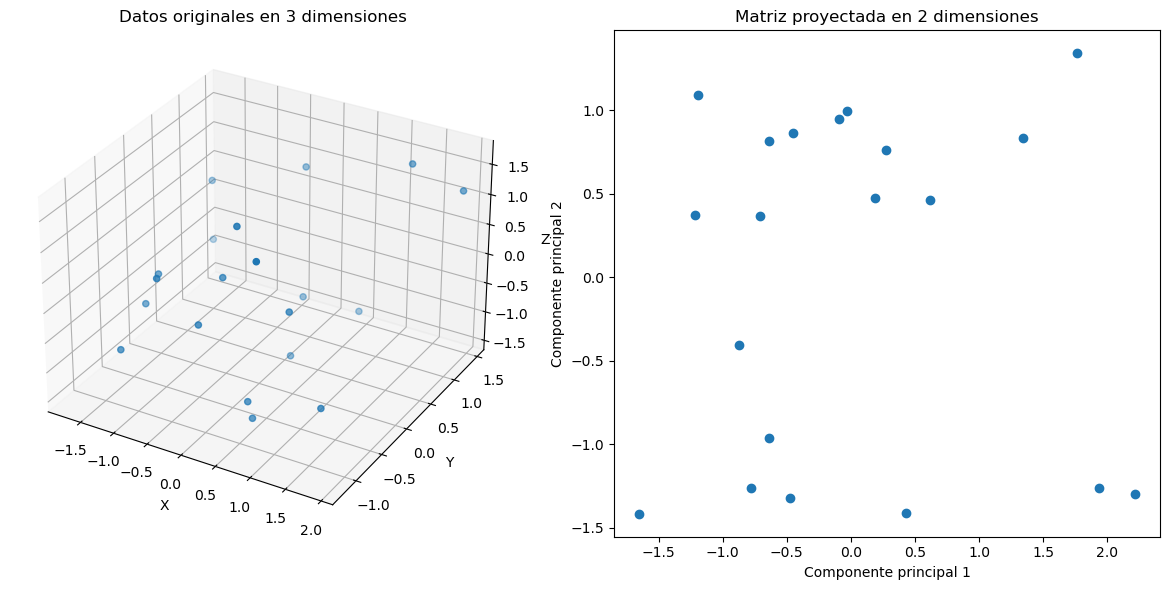

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Create a 3D scatter plot for the standardized matrix
fig = plt.figure(figsize=(12, 6))
ax1 = fig.add_subplot(121, projection='3d')

# Extract coordinates from the standardized matrix
x = standardized_matrix[:, 0]
y = standardized_matrix[:, 1]
z = standardized_matrix[:, 2]

# Plot the points
ax1.scatter(x, y, z)
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_zlabel('Z')
ax1.set_title('Datos originales en 3 dimensiones')

# Create a 2D scatter plot for the projected matrix
ax2 = fig.add_subplot(122)
ax2.scatter(projected_data[:, 0], projected_data[:, 1])
ax2.set_xlabel('Componente principal 1')
ax2.set_ylabel('Componente principal 2')
ax2.set_title('Matriz proyectada en 2 dimensiones')

# Show plot
plt.tight_layout()
plt.show()


<AxesSubplot: >

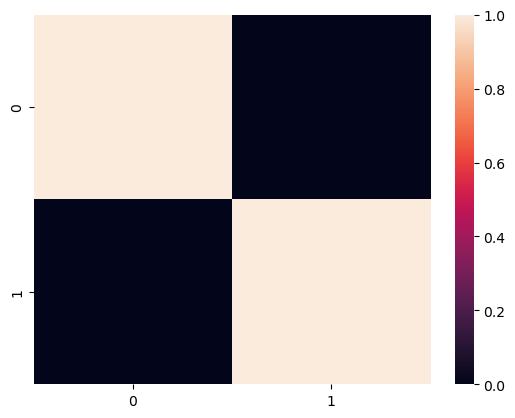

In [4]:
import seaborn as sns

corr = np.corrcoef(projected_data, rowvar=False)

sns.heatmap(corr)

<h3 id="subsection1-1" style="color: #003366;">Ejemplo 2</h3>

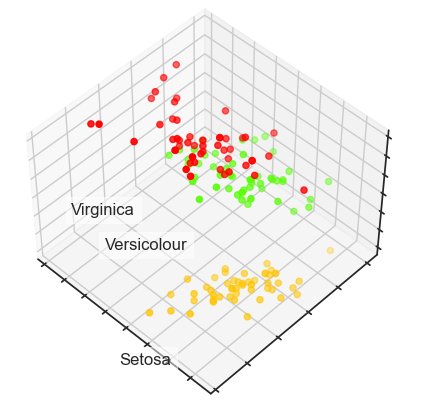

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(style='white')
from sklearn import decomposition
from sklearn import datasets
from mpl_toolkits.mplot3d import Axes3D

# Loading the dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Let's create a beautiful 3d-plot
fig = plt.figure(figsize=(6, 5))
plt.clf()
ax = fig.add_subplot(111, projection='3d', elev=48, azim=134)

plt.cla()

for name, label in [('Setosa', 0), ('Versicolour', 1), ('Virginica', 2)]:
    ax.text3D(X[y == label, 0].mean(),
              X[y == label, 1].mean() + 1.5,
              X[y == label, 2].mean(), name,
              horizontalalignment='center',
              bbox=dict(alpha=.5, edgecolor='w', facecolor='w'))
# Change the order of labels, so that they match
y_clr = np.choose(y, [1, 2, 0]).astype(np.float64)
sc = ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y_clr,
           cmap = plt.cm.get_cmap('prism', 3) )

ax.set_xticklabels([]);
ax.set_yticklabels([]);
ax.set_zticklabels([]);

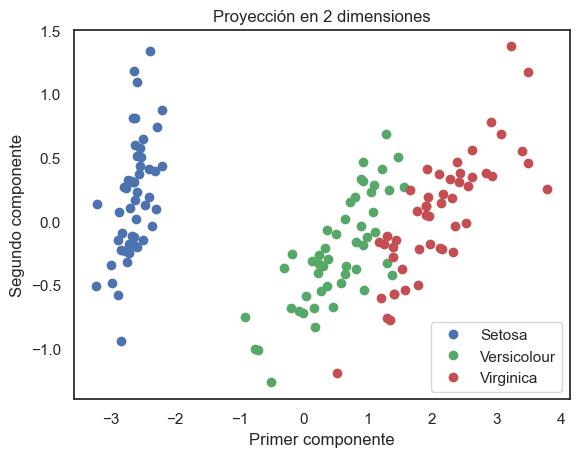

In [6]:
from sklearn import decomposition

# Using PCA from sklearn PCA
pca = decomposition.PCA(n_components=2)
X_centered = X - X.mean(axis=0)
pca.fit(X_centered)
X_pca = pca.transform(X_centered)

# Plotting the results of PCA
plt.plot(X_pca[y == 0, 0], X_pca[y == 0, 1], 'bo', label='Setosa')
plt.plot(X_pca[y == 1, 0], X_pca[y == 1, 1], 'go', label='Versicolour')
plt.plot(X_pca[y == 2, 0], X_pca[y == 2, 1], 'ro', label='Virginica')
plt.legend(loc=0)
plt.xlabel('Primer componente')
plt.ylabel('Segundo componente')
plt.title('Proyección en 2 dimensiones');

In [7]:
print('Varianza explicada para cada componente:', pca.explained_variance_ratio_)
print('Porcentaje de variación recuperada:', np.sum(pca.explained_variance_ratio_))

Varianza explicada para cada componente: [0.92461872 0.05306648]
Porcentaje de variación recuperada: 0.9776852063187949


<h3 id="subsection1-1" style="color: #003366;">Ejemplo 3</h3>

In [8]:
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_digits
import pandas as pd
from sklearn.decomposition import PCA

In [9]:
mnist = fetch_openml('mnist_784')

In [10]:
data = mnist['data']
data

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


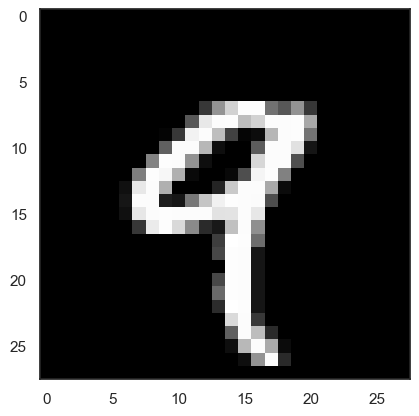

In [11]:
img_1 = data.iloc[4, :].to_numpy().reshape(28, 28)

import matplotlib.pyplot as plt

plt.imshow(img_1, cmap='gray')

In [12]:
def explainedVariance(percentage, images): 

    pca = PCA(percentage)
    pca.fit(images)
    components = pca.transform(images)
    approxOriginal = pca.inverse_transform(components)
    return approxOriginal

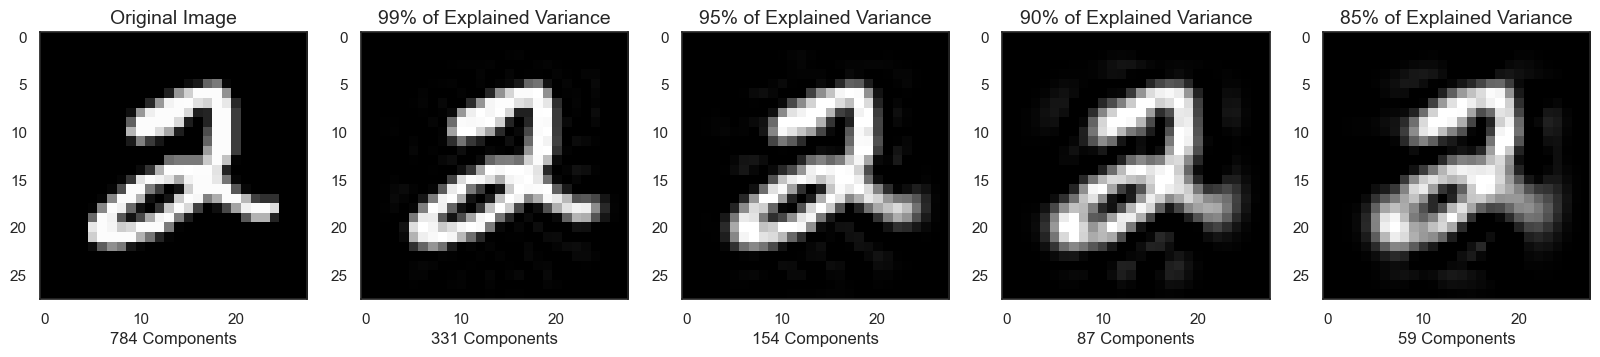

In [13]:
plt.figure(figsize=(20,4));

# Original Image (784 components)
plt.subplot(1, 5, 1);
plt.imshow(mnist.data.iloc[5].to_numpy().reshape(28,28),
              cmap = plt.cm.gray, interpolation='nearest',
              clim=(0, 255));
plt.xlabel('784 Components', fontsize = 12)
plt.title('Original Image', fontsize = 14);

# 331 principal components
plt.subplot(1, 5, 2);
plt.imshow(explainedVariance(.99, mnist.data)[5].reshape(28, 28),
              cmap = plt.cm.gray, interpolation='nearest',
              clim=(0, 255));
plt.xlabel('331 Components', fontsize = 12)
plt.title('99% of Explained Variance', fontsize = 14);

# 154 principal components
plt.subplot(1, 5, 3);
plt.imshow(explainedVariance(.95, mnist.data)[5].reshape(28, 28),
              cmap = plt.cm.gray, interpolation='nearest',
              clim=(0, 255));
plt.xlabel('154 Components', fontsize = 12)
plt.title('95% of Explained Variance', fontsize = 14);

# 87 principal components
plt.subplot(1, 5, 4);
plt.imshow(explainedVariance(.90, mnist.data)[5].reshape(28, 28),
              cmap = plt.cm.gray, interpolation='nearest',
              clim=(0, 255));
plt.xlabel('87 Components', fontsize = 12)
plt.title('90% of Explained Variance', fontsize = 14);

# 59 principal components
plt.subplot(1, 5, 5);
plt.imshow(explainedVariance(.85, mnist.data)[5].reshape(28, 28),
              cmap = plt.cm.gray, interpolation='nearest',
              clim=(0, 255));
plt.xlabel('59 Components', fontsize = 12)
plt.title('85% of Explained Variance', fontsize = 14);

---

<h2 id = "introduction" style="color: #007ACC;">Consideraciones</h2>

**Ventajas del Análisis de Componentes Principales**

1. **Reducción de Dimensionalidad**: PCA permite reducir la cantidad de variables en un conjunto de datos mientras se retiene la mayor cantidad posible de variabilidad original. Esto facilita el manejo y análisis de datos complejos y de alta dimensión.

2. **Eliminación de Redundancia**: Al identificar y combinar variables correlacionadas en componentes principales, PCA reduce la redundancia de la información en los datos.

3. **Mejora en la Interpretación y Visualización**: La reducción de dimensionalidad mediante PCA facilita la visualización de datos complejos en 2D o 3D, ayudando a identificar patrones y relaciones que podrían no ser evidentes en espacios de alta dimensión.

4. **Aceleración de Algoritmos de Aprendizaje Automático**: Al reducir el número de características, PCA puede acelerar el tiempo de procesamiento de los algoritmos de aprendizaje automático y mejorar su rendimiento al reducir el sobreajuste.

5. **Detección de Tendencias y Patrones Ocultos**: PCA puede revelar estructuras latentes en los datos, como tendencias y patrones que no son fácilmente visibles en los datos originales.

**Limitaciones del Análisis de Componentes Principales**

1. **Pérdida de Información**: Aunque PCA intenta retener la mayor cantidad de variabilidad posible, siempre hay una pérdida de información cuando se reduce el número de dimensiones.

2. **Interpretabilidad**: Los componentes principales generados pueden ser difíciles de interpretar, ya que son combinaciones lineales de las variables originales y no tienen un significado directo.

3. **Asume Linealidad**: PCA solo puede capturar relaciones lineales entre variables. Si los datos tienen relaciones no lineales, PCA no captura esta información.

4. **No Maneja Datos Categóricos**: PCA está diseñado para datos numéricos y no puede manejar variables categóricas directamente sin algún tipo de codificación previa. Como una alternativa para datos categóricos, existe la técnica conocida con el nombre de análisis de correspondencias.

5. El PCA es computacionalmente costoso y puede resultar inviable para matrices grandes de datos, por lo que es considerada una técnica ineficiente en muchos casos.

---

<h2 id = "introduction" style="color: #007ACC;">Variaciones del análisis de componentes principales</h2>

<h3 id="subsection1-1" style="color: #003366;">Análisis de componentes principales aleatorio </h3>

El ACP Aleatorio es una variante del ACP que utiliza técnicas de muestreo aleatorio y proyecciones aleatorias para aproximar los componentes principales de un conjunto de datos. Este enfoque es particularmente útil cuando se trabaja con grandes matrices de datos donde la aplicación del ACP tradicional sería demasiado lenta o ineficiente.

1. El ACP Aleatorio comienza proyectando los datos originales en un subespacio de menor dimensión utilizando una matriz aleatoria, \mathbf{R}. Esta matriz aleatoria se utiliza para capturar las características esenciales de los datos con una reducción significativa en el costo computacional, proyectando la matriz original sobre un subsepacio:

$$Y_{0} = \mathbf{\tilde{X}} \mathbf{R}$$

2. Una vez que los datos se han proyectado en el subespacio reducido, se aplica la Descomposición en Valores Singulares (SVD) a la matriz proyectada. Esta descomposición proporciona una aproximación de los componentes principales originales:

$$\mathbf{Y}_{0} = \mathbf{U}_{0} \mathbf{S}_{0} \mathbf{V}^{T}_{0}$$

3. Los componentes principales aproximados se refinan para mejorar la precisión de la estimación, utilizando iteraciones adicionales si es necesario. Sea $\mathbf{W}_{0}$ la matriz de los primeros $k$ componentes principales (las primeras $k$ columnas de $\mathbf{V}^{T}$), obtenemos la proyección:

$$\mathbf{C}_{0} = Y \mathbf{W}_{0}$$

4. Repetimos 2 y 3 hasta que haya una convergencia. Por ejemplo, una segunda iteración del proceso sería:

$$Y_{1} =  \mathbf{\tilde{X}} \left(\mathbf{\mathbf{X}^{T}} Y_{0}\right)$$
$$Y_{1} =  \mathbf{\tilde{X}} \left(\mathbf{\mathbf{X}^{T}} Y_{0}\right)$$
$$Y_{1} = \mathbf{U}_{1} \mathbf{S}_{1} \mathbf{V}^{T}_{1}$$
$$C_{1} = Y \mathbf{W}_{1}$$

En realidad,

$$\lim_{T \rightarrow \infty} C_{T} = C$$

**Ventajas del ACP Aleatorio:**

- Eficiencia Computacional: El ACP Aleatorio es significativamente más rápido que el ACP tradicional, especialmente cuando se trabaja con grandes conjuntos de datos. La proyección inicial a un subespacio de menor dimensión reduce drásticamente el tiempo de cómputo requerido.

- Escalabilidad: Este método es altamente escalable y puede manejar datos que son inabordables para las técnicas tradicionales debido a su tamaño o complejidad.

- Memoria: El ACP Aleatorio requiere menos memoria que el ACP tradicional, lo que lo hace adecuado para implementaciones en sistemas con recursos limitados.

- Precisión Adecuada: Aunque el ACP Aleatorio es una aproximación, en la mayoría de los casos proporciona resultados suficientemente precisos para las aplicaciones prácticas.

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(style='white')
from sklearn import decomposition
from sklearn import datasets
from mpl_toolkits.mplot3d import Axes3D

In [16]:
# Loading the dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [17]:
from sklearn import decomposition

pca1 = decomposition.PCA(n_components=2)
pca2 = decomposition.PCA(n_components=2, svd_solver='randomized')

X_centered = X - X.mean(axis=0)
                         
pca1.fit(X_centered)
pca2.fit(X_centered)

X_pca1 = pca1.transform(X_centered)
X_pca2 = pca2.transform(X_centered)

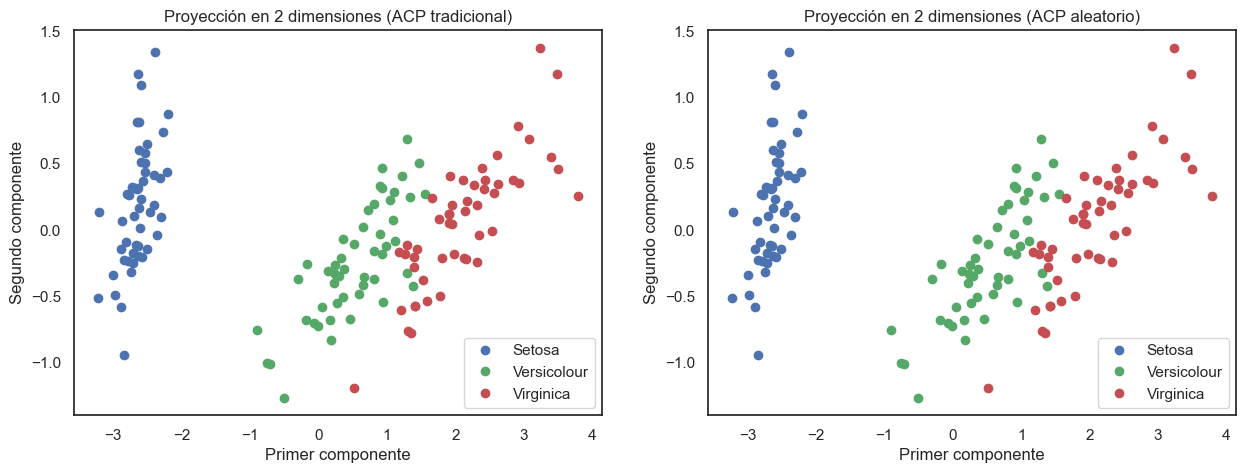

In [33]:
# Plotting the results of PCA
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

ax[0].plot(X_pca1[y == 0, 0], X_pca1[y == 0, 1], 'bo', label='Setosa')
ax[0].plot(X_pca1[y == 1, 0], X_pca1[y == 1, 1], 'go', label='Versicolour')
ax[0].plot(X_pca1[y == 2, 0], X_pca1[y == 2, 1], 'ro', label='Virginica')
ax[0].legend(loc=0)
ax[0].set_xlabel('Primer componente')
ax[0].set_ylabel('Segundo componente')
ax[0].set_title('Proyección en 2 dimensiones (ACP tradicional)');

ax[1].plot(X_pca2[y == 0, 0], X_pca2[y == 0, 1], 'bo', label='Setosa')
ax[1].plot(X_pca2[y == 1, 0], X_pca2[y == 1, 1], 'go', label='Versicolour')
ax[1].plot(X_pca2[y == 2, 0], X_pca2[y == 2, 1], 'ro', label='Virginica')
ax[1].legend(loc=0)
ax[1].set_xlabel('Primer componente')
ax[1].set_ylabel('Segundo componente')
ax[1].set_title('Proyección en 2 dimensiones (ACP aleatorio)');

In [23]:
X_pca1 == X_pca2

array([[False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [Fal

<h3 id="subsection1-1" style="color: #003366;">Análisis de componentes principales incremental</h3>

Uno de los problemas con el ACP es que necesita contar con toda la matriz de datos almacenada en memoria para ser entrenado, lo cuál puede salir costoso para matrices grandes. Afortunadamente, existe el ACP incremental, que ayuda a entrenar el modelo por mini lotes, tal que el modelo se entrena un mini lote a la vez.

Sea $\mathbf{X}$ una matriz de $n \text{x} m$, dividimos en $p$ minilotes de $b$ observaciones cada uno, tal que $k = \frac{m}{b}$. Para cada uno de los minilotes aplicamos el ACP tradicional, y finalmente, promediamos los componentes acumulados de todos los minilotes.

In [37]:
n_batches = 10

inc_pca = decomposition.IncrementalPCA(n_components=2)

for X_batch in np.array_split(X_centered, n_batches):
    inc_pca.partial_fit(X_batch)

In [39]:
X_reduced = inc_pca.transform(X_centered)

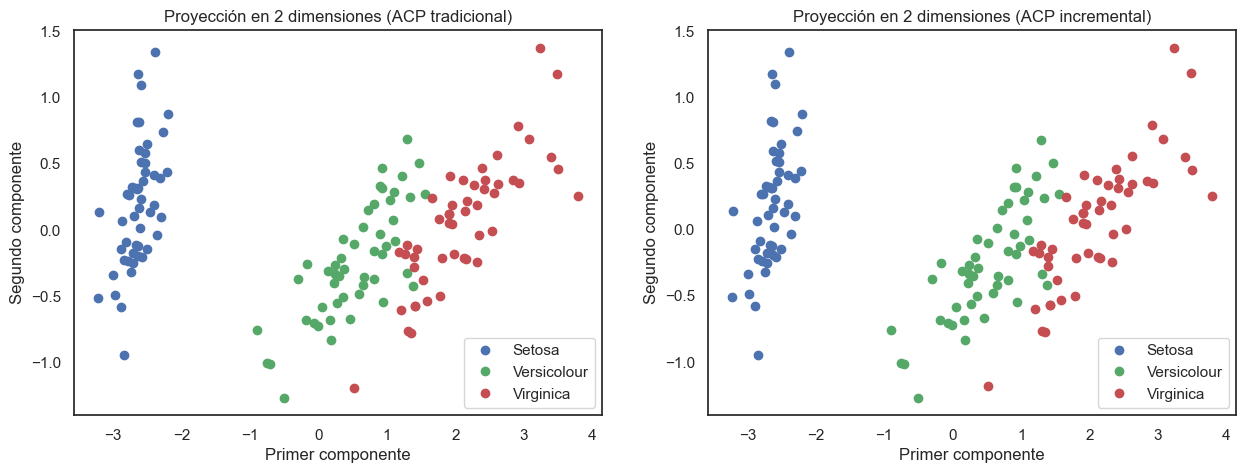

In [40]:
# Plotting the results of PCA
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

ax[0].plot(X_pca1[y == 0, 0], X_pca1[y == 0, 1], 'bo', label='Setosa')
ax[0].plot(X_pca1[y == 1, 0], X_pca1[y == 1, 1], 'go', label='Versicolour')
ax[0].plot(X_pca1[y == 2, 0], X_pca1[y == 2, 1], 'ro', label='Virginica')
ax[0].legend(loc=0)
ax[0].set_xlabel('Primer componente')
ax[0].set_ylabel('Segundo componente')
ax[0].set_title('Proyección en 2 dimensiones (ACP tradicional)');

ax[1].plot(X_reduced[y == 0, 0], X_reduced[y == 0, 1], 'bo', label='Setosa')
ax[1].plot(X_reduced[y == 1, 0], X_reduced[y == 1, 1], 'go', label='Versicolour')
ax[1].plot(X_reduced[y == 2, 0], X_reduced[y == 2, 1], 'ro', label='Virginica')
ax[1].legend(loc=0)
ax[1].set_xlabel('Primer componente')
ax[1].set_ylabel('Segundo componente')
ax[1].set_title('Proyección en 2 dimensiones (ACP incremental)');

In [41]:
X_pca1 == X_reduced

array([[False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [Fal

---

<h2 id="reference" style="color: #007ACC;">Referencias</h2>

**<h2 style="color: #007ACC;">Créditos</h2>**

---

**Docente:** Juan Felipe Contreras Alcívar

**Universidad Pedagógica y Tecnológica de Colombia** - *Diplomado en Data Science: Aplicaciones con Machine Learning - Cohorte II - 2024*


---